In [2]:
#Importing Libraries 
import pandas as pd
import nltk
from nltk.corpus import stopwords
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle
import warnings
warnings.simplefilter("ignore")

In [6]:
#loading dataset
df = pd.read_csv("amazon_reviews_cleaned_data.csv",encoding="latin1")

toCheck = pd.read_csv("../datasets/amazon_reviews_updated_data.csv",encoding="latin1")
#removing max
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#dropping extra columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)
toCheck.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
#checking NULL rows from pre-processing
checkNULL = df.isnull()
checkNULL = checkNULL.any(axis=1)
df[checkNULL]

,review_text,verified_purchase
191,NaN,True
523,NaN,True
1072,NaN,True
1111,NaN,True
1230,NaN,True
1316,NaN,True


In [8]:
toCheck = toCheck.drop_duplicates().reset_index(drop=True)

In [9]:
toCheck.iloc[[191,523,1072,1111,1230,1316],[3,4]]

,review_text,verified_purchase
191,A+,True
523,5*,True
1072,very,True
1111,Does what it should,True
1230,A+,True
1316,A*****,True


In [10]:
#Now we drop the NULL rows
df = df.dropna(how='any',axis=0) 

In [11]:
#showing updated verified purchase values
df["verified_purchase"].value_counts(normalize=True)

verified_purchase
False    0.525701
True     0.474299
Name: proportion, dtype: float64

In [12]:
#Starting model Training
#Diving columns into input(review_text) and target(verified_purchases)
X = df['review_text'] 
y = df['verified_purchase'] 

In [13]:
#splitting the data
#SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(
    df['review_text'], df['verified_purchase'],test_size=0.4, random_state=42) #40% gives best results, 42 is no of life...

entiredf = format(df.shape[0])
traindf = format(X_train.shape[0])
testdf = format(X_test.shape[0])

print('Number of rows:')
print('Entire dataset:', entiredf)
print('Train dataset:', traindf)
print('Test dataset:',testdf)

Number of rows:
Entire dataset: 1712
Train dataset: 1027
Test dataset: 685


In [15]:
count_vectorizer  = CountVectorizer(stop_words='english')
count_vectorizer.fit(X_train)
print('\nVocabulary: \n', count_vectorizer.vocabulary_)

train_c = count_vectorizer.fit_transform(X_train)
test_c = count_vectorizer.transform(X_test)


Vocabulary: 
 {'current': 415, 'sell': 1498, 'price': 1310, 'compar': 343, 'supermarket': 1705, 'good': 761, 'smell': 1563, 'pleasant': 1270, 'need': 1134, 'add': 14, 'small': 1558, 'cloth': 321, 'fresh': 701, 'great': 777, 'moisturis': 1100, 'sensit': 1502, 'love': 1010, 'pour': 1293, 'smaller': 1559, 'bottl': 194, 'make': 1033, 'manag': 1037, 'beat': 137, 'decent': 434, 'fabric': 616, 'soften': 1580, 'nice': 1142, 'fragranc': 696, 'purchas': 1334, 'deliveri': 458, 'cream': 399, 'handwash': 802, 'cheaper': 282, 'hand': 799, 'better': 155, 'liquid': 989, 'oh': 1174, 'wing': 1916, 'dove': 516, 'kitchen': 941, 'bathroom': 131, 'shower': 1527, 'room': 1436, 'recommend': 1378, 'highli': 831, 'star': 1636, 'simpl': 1537, 'gel': 728, 'like': 978, 'glue': 754, 'hard': 806, 'rub': 1444, 'slip': 1555, 'bath': 130, 'goe': 757, 'smoothli': 1569, 'easili': 541, 'wast': 1884, 'leav': 965, 'feel': 645, 'silki': 1535, 'soft': 1579, 'scenti': 1477, 'review': 1419, 'collect': 328, 'promot': 1322, 'exc

In [17]:
"MULTINOMINAL NAIVE BAYES MODEL"

'MULTINOMINAL NAIVE BAYES MODEL'

In [18]:
#Running multinomical naive bayes model
mnb1 = MultinomialNB()
mnb1.fit(train_c, y_train)
prediction = mnb1.predict(test_c)

In [20]:
#Evaluation
mnb_a1 = accuracy_score(y_test, prediction)*100
mnb_p1 = precision_score(y_test, prediction)* 100
mnb_r1 = recall_score(y_test, prediction)*100
mnb_f11 = f1_score(y_test, prediction)*100

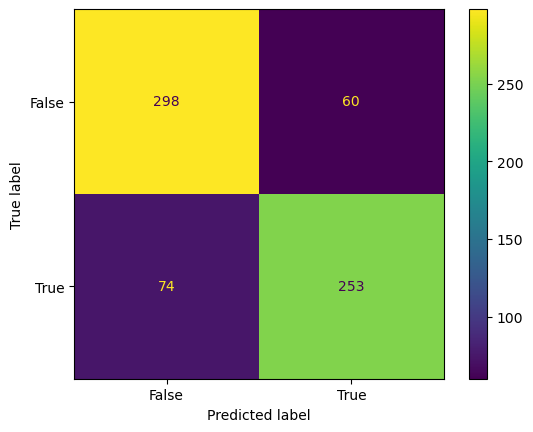

In [21]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=mnb1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mnb1.classes_) 
display.plot() 

In [22]:
"SUPPORT VECTOR MACHINE MODEL"

'SUPPORT VECTOR MACHINE MODEL'

In [23]:
#implementing and running support vector machine model
svm1 = SVC(kernel='linear')
svm1.fit(train_c, y_train)
prediction = svm1.predict(test_c)

In [24]:
#Evaluation
svm_a1 = accuracy_score(y_test, prediction)*100
svm_p1 = precision_score(y_test, prediction)* 100
svm_r1 = recall_score(y_test, prediction)*100
svm_f11 = f1_score(y_test, prediction)*100

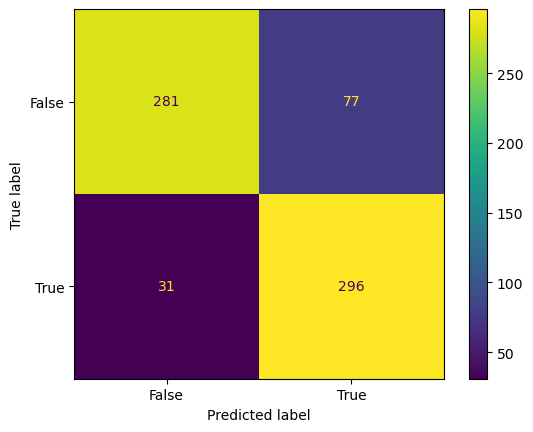

In [25]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=svm1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm1.classes_) 
display.plot() 

In [27]:
"LOGISTIC REGRESSION MODEL"

'LOGISTIC REGRESSION MODEL'

In [28]:
#implementing and running Logistic Regression Model
lr1 = LogisticRegression()
lr1.fit(train_c, y_train)
prediction = lr1.predict(test_c)

In [29]:
#Evaluation
lr_a1 = accuracy_score(y_test, prediction)*100
lr_p1 = precision_score(y_test, prediction)* 100
lr_r1 = recall_score(y_test, prediction)*100
lr_f11 = f1_score(y_test, prediction)*100

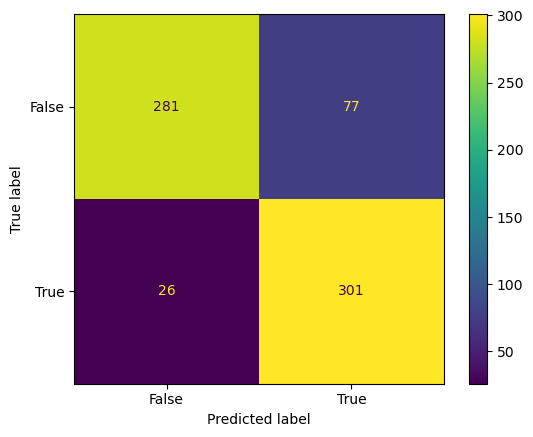

In [30]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=lr1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr1.classes_) 
display.plot() 

In [31]:
#TFIDF VECTORIZER AND MODELING
TFIDF_vectorizer  = TfidfVectorizer(stop_words='english')

TFIDF_vectorizer.fit(X_train)
print('\nVocabulary: \n', TFIDF_vectorizer.vocabulary_)

train_tf = TFIDF_vectorizer.fit_transform(X_train)
test_tf = TFIDF_vectorizer.transform(X_test)


Vocabulary: 
 {'current': 415, 'sell': 1498, 'price': 1310, 'compar': 343, 'supermarket': 1705, 'good': 761, 'smell': 1563, 'pleasant': 1270, 'need': 1134, 'add': 14, 'small': 1558, 'cloth': 321, 'fresh': 701, 'great': 777, 'moisturis': 1100, 'sensit': 1502, 'love': 1010, 'pour': 1293, 'smaller': 1559, 'bottl': 194, 'make': 1033, 'manag': 1037, 'beat': 137, 'decent': 434, 'fabric': 616, 'soften': 1580, 'nice': 1142, 'fragranc': 696, 'purchas': 1334, 'deliveri': 458, 'cream': 399, 'handwash': 802, 'cheaper': 282, 'hand': 799, 'better': 155, 'liquid': 989, 'oh': 1174, 'wing': 1916, 'dove': 516, 'kitchen': 941, 'bathroom': 131, 'shower': 1527, 'room': 1436, 'recommend': 1378, 'highli': 831, 'star': 1636, 'simpl': 1537, 'gel': 728, 'like': 978, 'glue': 754, 'hard': 806, 'rub': 1444, 'slip': 1555, 'bath': 130, 'goe': 757, 'smoothli': 1569, 'easili': 541, 'wast': 1884, 'leav': 965, 'feel': 645, 'silki': 1535, 'soft': 1579, 'scenti': 1477, 'review': 1419, 'collect': 328, 'promot': 1322, 'exc

In [32]:
"MULTINOMIAL NAIVE BAYES MODEL"

'MULTINOMIAL NAIVE BAYES MODEL'

In [33]:
#Implementing and running multinomial naive bayes model
mnb2 = MultinomialNB()
mnb2.fit(train_tf, y_train)
prediction = mnb2.predict(test_tf)

In [34]:
#Evaluation
mnb_a2 = accuracy_score(y_test, prediction)*100
mnb_p2 = precision_score(y_test, prediction)* 100
mnb_r2 = recall_score(y_test, prediction)*100
mnb_f12 = f1_score(y_test, prediction)*100

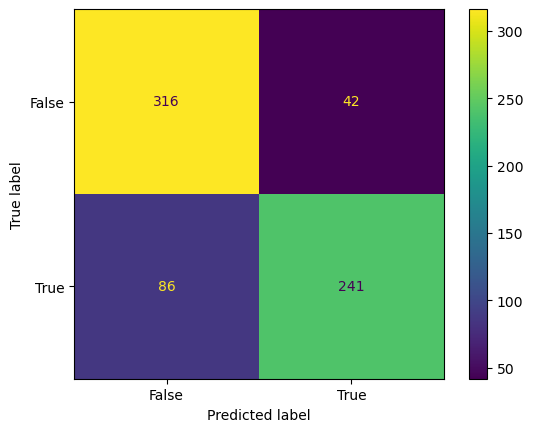

In [35]:
#Confusion matrix
cm =  confusion_matrix(y_test, prediction, labels=mnb2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mnb2.classes_) 
display.plot()

In [36]:
"SUPPORT VECTOR MACHINE MODEL"

'SUPPORT VECTOR MACHINE MODEL'

In [37]:
#implementing and running support vector machine model
svm2 = SVC(kernel='linear')
svm2.fit(train_tf, y_train)
prediction = svm2.predict(test_tf)

In [38]:
#Evaluation
svm_a2 = accuracy_score(y_test, prediction)*100
svm_p2 = precision_score(y_test, prediction)* 100
svm_r2 = recall_score(y_test, prediction)*100
svm_f12 = f1_score(y_test, prediction)*100

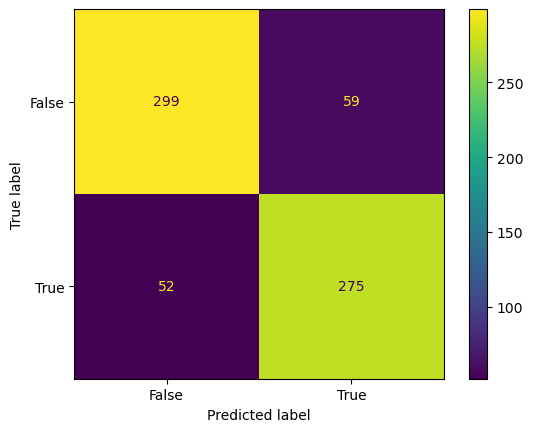

In [39]:
#Confusion matrix
cm =  confusion_matrix(y_test, prediction, labels=svm2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm2.classes_) 
display.plot() 

In [40]:
"LOGISTIC REGRESSION MODEL"

'LOGISTIC REGRESSION MODEL'

In [41]:
#implementing and running Logistic Regression model
lr2 = LogisticRegression()
lr2.fit(train_tf, y_train)
prediction = lr2.predict(test_tf)

In [42]:
#Evaluation
lr_a2 = accuracy_score(y_test, prediction)*100
lr_p2 = precision_score(y_test, prediction)* 100
lr_r2 = recall_score(y_test, prediction)*100
lr_f12 = f1_score(y_test, prediction)*100

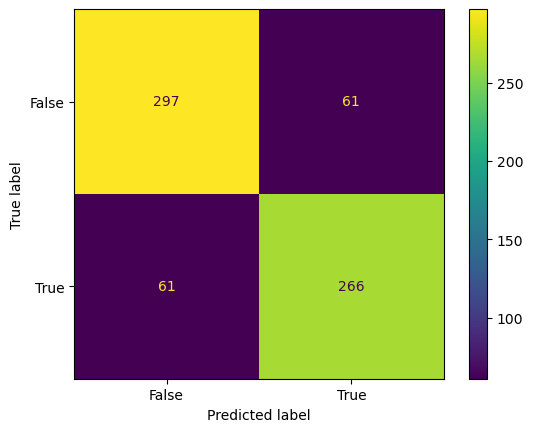

In [43]:
#Confusion matrix
cm =  confusion_matrix(y_test, prediction, labels=lr2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr2.classes_) 
display.plot() 

In [51]:
#COMPARING ACCURACY
model_accuracy={'MNB': [round(mnb_a1), round(mnb_a2)],
                'SVM': [round(svm_a1), round(svm_a2)],
                'LR': [round(lr_a1), round(lr_a2)]
               }
ma = pd.DataFrame(model_accuracy, columns = ['MNB','SVM','LR'], index=['Count Vectorizer','Tfidf Vectorizer'])
ma

,MNB,SVM,LR
Count Vectorizer,80,84,85
Tfidf Vectorizer,81,84,82


In [52]:
#COMPARING PRECISION
model_precision={'MNB': [round(mnb_p1), round(mnb_p2)],
                'SVM': [round(svm_p1), round(svm_p2)],
                'LR': [round(lr_p1), round(lr_p2)]
               }
mp = pd.DataFrame(model_precision, columns = ['MNB','SVM','LR'], index=['Count Vectorizer','Tfidf Vectorizer'])
mp

,MNB,SVM,LR
Count Vectorizer,81,79,80
Tfidf Vectorizer,85,82,81


In [53]:
#COMPARING RECALL
model_recall={'MNB': [round(mnb_r1), round(mnb_r2)],
                'SVM': [round(svm_r1), round(svm_r2)],
                'LR': [round(lr_r1), round(lr_r2)]
               }
mr = pd.DataFrame(model_recall, columns = ['MNB','SVM','LR'], index=['Count Vectorizer','Tfidf Vectorizer'])
mr

,MNB,SVM,LR
Count Vectorizer,77,91,92
Tfidf Vectorizer,74,84,81


In [54]:
#COMPARING F1 SCORE
model_f1={'MNB': [round(mnb_f11), round(mnb_f12)],
                'SVM': [round(svm_f11), round(svm_f12)],
                'LR': [round(lr_f11), round(lr_f12)]
               }
mf1 = pd.DataFrame(model_f1, columns = ['MNB','SVM','LR'], index=['Count Vectorizer','Tfidf Vectorizer'])
mf1

,MNB,SVM,LR
Count Vectorizer,79,85,85
Tfidf Vectorizer,79,83,81


In [56]:
#From the evaluation, LOGISTIC REGRESSION with COUNT VECTORIZER is the best

#Saving the Logistic Regression Model with its Count Vectorizer
pickle.dump(lr1, open('logistic_regression_model.pkl', 'wb'))
pickle.dump(count_vectorizer, open('count_vectorizer.pkl', 'wb'))